In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Skip the first row (row 0 is the first, so skip 1 row)
df = pd.read_excel(r'C:\Users\SAURABH SINGH\Desktop\SAURABH\Data Scientist\Projects\Python\ATB project\Brevard\Brevard Claim Analysis.xlsx', skiprows=1)


In [2]:
df.head(5)

,Voucher Number,Account Number,Patient Last Name,Patient First Name,Primary Insurance Carrier,Secondary Insurance Carrier,Current Carrier,Service Date,Post Date,Department,...,Allowed Amount,Adjusted Allowed,Reason Code Date,Latest Reason Code,Last Payment Date,Patient Payments,Insurance Payments,Payment Amount,Balance,Collection Adjustments
0,50119501,12050,ABBOTT,ELAINE,Medicare Florida,Medicaid Florida,Medicaid Florida,2025-06-05,2025-06-10,Brevard Geriatrics,...,60.68,47.57,2025-07-03,CO-256,2025-07-02,0.0,47.57,47.57,0.0,0.0
1,50119539,12050,ABBOTT,ELAINE,Medicare Florida,Medicaid Florida,Medicaid Florida,2025-06-07,2025-06-10,Brevard Geriatrics,...,60.68,47.57,2025-07-03,CO-256,2025-07-02,0.0,47.57,47.57,0.0,0.0
2,50119920,12050,ABBOTT,ELAINE,Medicare Florida,Medicaid Florida,Medicaid Florida,2025-06-12,2025-06-13,Brevard Geriatrics,...,88.27,69.21,2025-09-05,CO-16,2025-09-03,0.0,69.21,69.21,0.0,0.0
3,50120585,12050,ABBOTT,ELAINE,Medicare Florida,Medicaid Florida,Medicaid Florida,2025-06-13,2025-06-24,Brevard Geriatrics,...,60.68,47.57,2025-09-05,CO-16,2025-09-03,0.0,47.57,47.57,0.0,0.0
4,50120915,12050,ABBOTT,ELAINE,Medicare Florida,Medicaid Florida,Medicare Florida,2025-06-04,2025-06-25,Brevard Geriatrics,...,124.83,122.33,2025-07-17,CO-16,2025-07-16,0.0,122.33,122.33,0.0,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56910 entries, 0 to 56909
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Voucher Number               56910 non-null  object        
 1   Account Number               56909 non-null  float64       
 2   Patient Last Name            56905 non-null  object        
 3   Patient First Name           56907 non-null  object        
 4   Primary Insurance Carrier    56907 non-null  object        
 5   Secondary Insurance Carrier  56907 non-null  object        
 6   Current Carrier              56907 non-null  object        
 7   Service Date                 56907 non-null  datetime64[ns]
 8   Post Date                    56907 non-null  datetime64[ns]
 9   Department                   56907 non-null  object        
 10  Place of Service             56907 non-null  object        
 11  Actual Provider              56907 non-nu

In [20]:
df.isnull()

,Voucher Number,Account Number,Patient Last Name,Patient First Name,Primary Insurance Carrier,Secondary Insurance Carrier,Current Carrier,Service Date,Post Date,Department,...,Allowed Amount,Adjusted Allowed,Reason Code Date,Latest Reason Code,Last Payment Date,Patient Payments,Insurance Payments,Payment Amount,Balance,Collection Adjustments
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
56906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
56907,False,True,True,True,True,True,True,True,True,True,...,False,False,True,True,True,False,False,False,False,False
56908,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [7]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ','_')
    .str.replace('-','_')
)


In [35]:
df.head(2)

,voucher_number,account_number,patient_last_name,patient_first_name,primary_insurance_carrier,secondary_insurance_carrier,current_carrier,service_date,post_date,department,...,allowed_amount,adjusted_allowed,reason_code_date,latest_reason_code,last_payment_date,patient_payments,insurance_payments,payment_amount,balance,collection_adjustments
0,50119501,12050.0,ABBOTT,ELAINE,Medicare Florida,Medicaid Florida,Medicaid Florida,2025-06-05 00:00:00,2025-06-10 00:00:00,Brevard Geriatrics,...,60.68,47.57,2025-07-03 00:00:00,CO-256,2025-07-02 00:00:00,0.0,47.57,47.57,0.0,0.0
1,50119539,12050.0,ABBOTT,ELAINE,Medicare Florida,Medicaid Florida,Medicaid Florida,2025-06-07 00:00:00,2025-06-10 00:00:00,Brevard Geriatrics,...,60.68,47.57,2025-07-03 00:00:00,CO-256,2025-07-02 00:00:00,0.0,47.57,47.57,0.0,0.0


In [36]:
df =df.fillna(0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56910 entries, 0 to 56909
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   voucher_number               56910 non-null  object 
 1   account_number               56910 non-null  float64
 2   patient_last_name            56910 non-null  object 
 3   patient_first_name           56910 non-null  object 
 4   primary_insurance_carrier    56910 non-null  object 
 5   secondary_insurance_carrier  56910 non-null  object 
 6   current_carrier              56910 non-null  object 
 7   service_date                 56910 non-null  object 
 8   post_date                    56910 non-null  object 
 9   department                   56910 non-null  object 
 10  place_of_service             56910 non-null  object 
 11  actual_provider              56910 non-null  object 
 12  billing_provider             56910 non-null  object 
 13  procedure_code  

In [37]:
voucher_number_dtype=df['voucher_number'].dtype

print(voucher_number_dtype)


object


In [38]:
patient_payments_dtype=df['patient_payments'].dtype

print(patient_payments_dtype)

float64


In [39]:
duplicates =df['voucher_number'].duplicated()

print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
56905    False
56906    False
56907    False
56908    False
56909    False
Name: voucher_number, Length: 56910, dtype: bool


In [40]:
# Get rows where 'voucher_number' is duplicated
duplicated_rows = df[df['voucher_number'].duplicated()]

print(duplicated_rows)


      voucher_number  account_number patient_last_name patient_first_name  \
487         50085101         34370.0            ALESSI            MICHAEL   
1196        50085100          1680.0         ALVARINAS            SUZANNE   
1599        50111339         16100.0      ANDREA-EINMO           PENELOPE   
1605        50114333         16100.0      ANDREA-EINMO           PENELOPE   
1759        50082492         37830.0           ANTHONY            BARBARA   
...              ...             ...               ...                ...   
55384          43010         35200.0          WILLIAMS          ROOSEVELT   
55861       50109011         37200.0        WINNINGHAM               TINA   
56503       50125111         23300.0             WYMAN             THOMAS   
56702           2860          1900.0             YULFO            RINALDO   
56706          36760          1900.0             YULFO            RINALDO   

      primary_insurance_carrier     secondary_insurance_carrier  \
487     

In [41]:
df.columns.tolist()

['voucher_number',
 'account_number',
 'patient_last_name',
 'patient_first_name',
 'primary_insurance_carrier',
 'secondary_insurance_carrier',
 'current_carrier',
 'service_date',
 'post_date',
 'department',
 'place_of_service',
 'actual_provider',
 'billing_provider',
 'procedure_code',
 'procedure_description',
 'modifiers',
 'charge_amt',
 'allowed_amount',
 'adjusted_allowed',
 'reason_code_date',
 'latest_reason_code',
 'last_payment_date',
 'patient_payments',
 'insurance_payments',
 'payment_amount',
 'balance',
 'collection_adjustments']

In [57]:
df.info()
df.head(1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56910 entries, 0 to 56909
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   voucher_number               56910 non-null  object 
 1   account_number               56910 non-null  float64
 2   patient_last_name            56910 non-null  object 
 3   patient_first_name           56910 non-null  object 
 4   primary_insurance_carrier    56910 non-null  object 
 5   secondary_insurance_carrier  56910 non-null  object 
 6   current_carrier              56910 non-null  object 
 7   service_date                 56910 non-null  object 
 8   post_date                    56910 non-null  object 
 9   department                   56910 non-null  object 
 10  place_of_service             56910 non-null  object 
 11  actual_provider              56910 non-null  object 
 12  billing_provider             56910 non-null  object 
 13  procedure_code  

,voucher_number,account_number,patient_last_name,patient_first_name,primary_insurance_carrier,secondary_insurance_carrier,current_carrier,service_date,post_date,department,...,adjusted_allowed,reason_code_date,latest_reason_code,last_payment_date,patient_payments,insurance_payments,payment_amount,balance,collection_adjustments,total_payments
0,50119501,12050.0,ABBOTT,ELAINE,Medicare Florida,Medicaid Florida,Medicaid Florida,2025-06-05 00:00:00,2025-06-10 00:00:00,Brevard Geriatrics,...,47.57,2025-07-03 00:00:00,CO-256,2025-07-02 00:00:00,0.0,47.57,47.57,0.0,0.0,47.57


In [63]:

df[["patient_payments", "insurance_payments", "total_payments"]].head()


,patient_payments,insurance_payments,total_payments
0,0.0,47.57,47.57
1,0.0,47.57,47.57
2,0.0,69.21,69.21
3,0.0,47.57,47.57
4,0.0,122.33,122.33


In [61]:
df.columns
df.dtypes

voucher_number                  object
account_number                 float64
patient_last_name               object
patient_first_name              object
primary_insurance_carrier       object
secondary_insurance_carrier     object
current_carrier                 object
service_date                    object
post_date                       object
department                      object
place_of_service                object
actual_provider                 object
billing_provider                object
procedure_code                  object
procedure_description           object
modifiers                       object
charge_amt                     float64
allowed_amount                 float64
adjusted_allowed               float64
reason_code_date                object
latest_reason_code              object
last_payment_date               object
patient_payments               float64
insurance_payments             float64
payment_amount                 float64
balance                  

# 1. Which Insurance Carrier has the Highest Outstanding AR?

In [38]:
top10_carriers = (
    df.groupby("primary_insurance_carrier")["balance"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plot_top10(
    top10_carriers,
    "Top 10 Insurance Carriers by Outstanding AR",
    "Insurance Carrier",
    "Outstanding AR ($)",
    "viridis"
)


NameError: name 'plot_top10' is not defined

# 2. Top 10 Aging Buckets by Outstanding AR

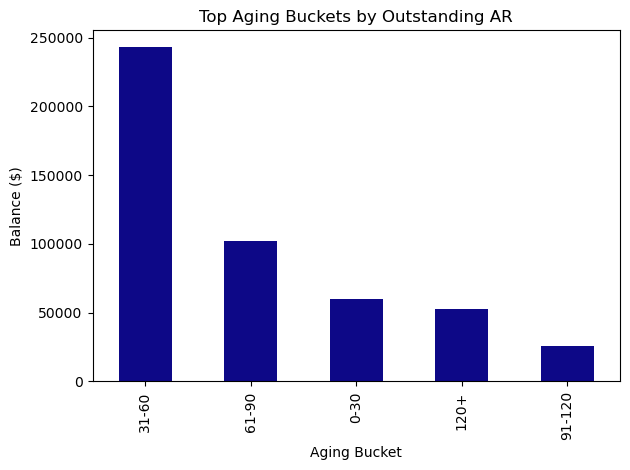

In [21]:
import pandas as pd

df["post_date"] = pd.to_datetime(df["post_date"], errors="coerce")

df["ar_days"] = (pd.Timestamp.today() - df["post_date"]).dt.days


bins = [-1, 30, 60, 90, 120, 9999]
labels = ["0-30", "31-60", "61-90", "91-120", "120+"]

df["aging_bucket"] = pd.cut(df["ar_days"], bins=bins, labels=labels)

top10_aging = (
    df.groupby("aging_bucket")["balance"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top10_aging.plot(kind="bar", colormap="plasma")
plt.title("Top Aging Buckets by Outstanding AR")
plt.xlabel("Aging Bucket")
plt.ylabel("Balance ($)")
plt.tight_layout()
plt.show()


# 3. Top 10 Departments by Total Charges

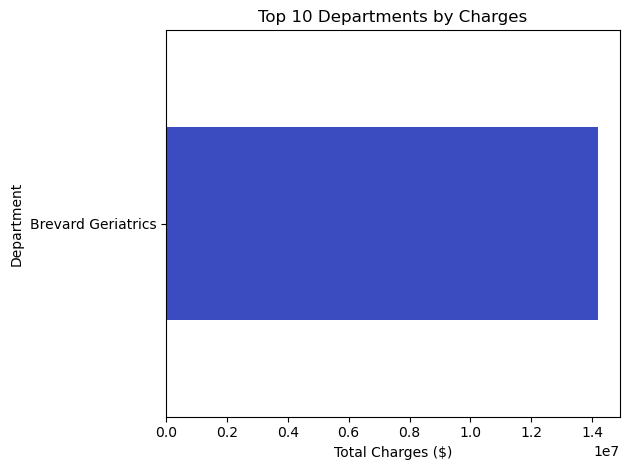

In [24]:
top10_dept = (
    df.groupby("department")["charge_amt"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top10_dept.plot(kind="barh", colormap="coolwarm")
plt.title("Top 10 Departments by Charges")
plt.xlabel("Total Charges ($)")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


# 4. Top 10 Months by Total Payments

In [ ]:
# df["post_date"] = pd.to_datetime(df["post_date"], errors="coerce")
df["post_month"] = df["post_date"].dt.to_period("M").astype(str)

df["total_payments"] = (
    df["patient_payments"].fillna(0) +
    df["insurance_payments"].fillna(0)
)
df[["patient_payments", "insurance_payments", "total_payments"]].head()


top10_months = (
    df.groupby("post_month")["total_payments"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top10_months.plot(kind="bar", colormap="tab10")
plt.title("Top 10 Months by Payment Collection")
plt.xlabel("Month")
plt.ylabel("Payments ($)")
plt.tight_layout()
plt.show()


# 5. Top 10 Providers by Average Collection Rate 

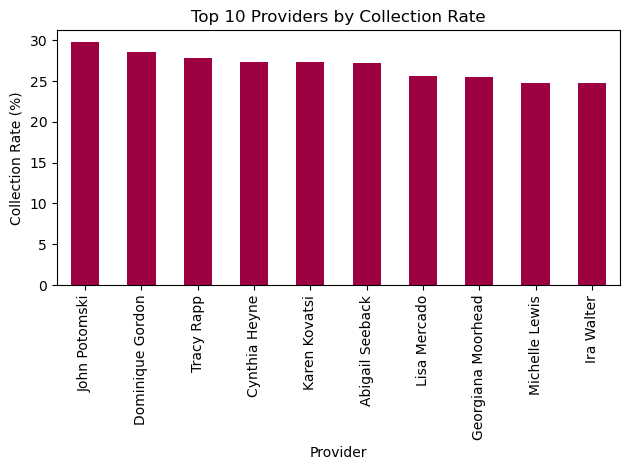

In [29]:
df["collection_rate"] = (
    df["total_payments"] / df["charge_amt"]
) * 100


top10_providers = (
    df.groupby("billing_provider")["collection_rate"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top10_providers.plot(kind="bar", colormap="Spectral")
plt.title("Top 10 Providers by Collection Rate")
plt.xlabel("Provider")
plt.ylabel("Collection Rate (%)")
plt.tight_layout()
plt.show()


# 6. Top 10 Denial Reason Codes by AR Impact 

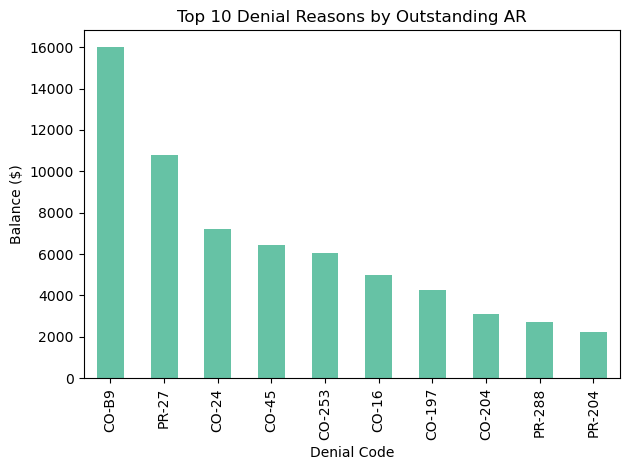

In [30]:
top10_denials = (
    df.groupby("latest_reason_code")["balance"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top10_denials.plot(kind="bar", colormap="Set2")
plt.title("Top 10 Denial Reasons by Outstanding AR")
plt.xlabel("Denial Code")
plt.ylabel("Balance ($)")
plt.tight_layout()
plt.show()


In [33]:
df["is_denied"] = df["latest_reason_code"].notna()
df[["latest_reason_code", "is_denied"]].head()
top10_denial_vouchers = (
    df[df["is_denied"]]
      .groupby("latest_reason_code")["voucher_number"]
      .nunique()
      .sort_values(ascending=False)
      .head(10)
)


import matplotlib.pyplot as plt

plt.figure()
top10_denial_vouchers.plot(kind="bar", colormap="Set2")
plt.title("Top 10 Denial Reasons by Denied Voucher Count")
plt.xlabel("Denial Reason Code")
plt.ylabel("Number of Denied Vouchers")
plt.tight_layout()
plt.show()

)


SyntaxError: unmatched ')' (2580445088.py, line 22)

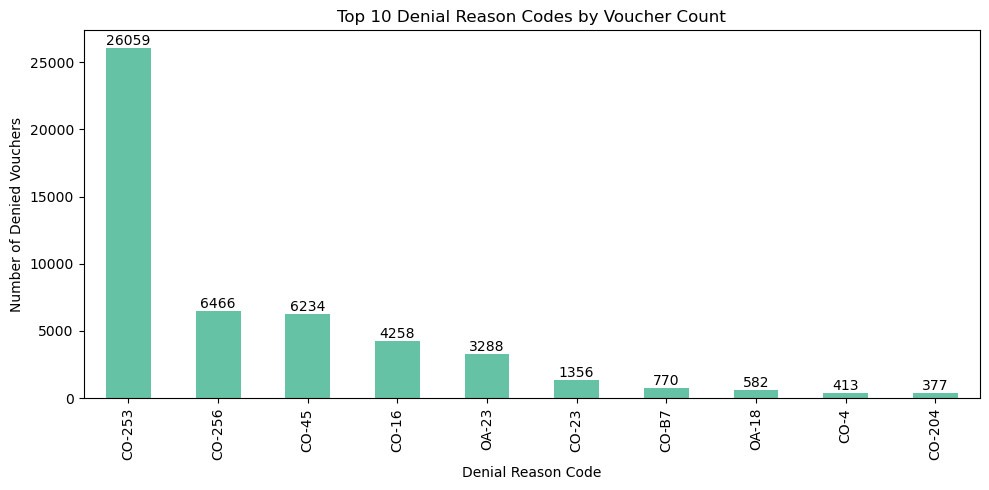

In [37]:
import matplotlib.pyplot as plt

# Create denial flag
df["is_denied"] = df["latest_reason_code"].notna()

# Top 10 denial reason codes by voucher count
top10_denial_voucher_count = (
    df[df["is_denied"]]
      .groupby("latest_reason_code")["voucher_number"]
      .nunique()
      .sort_values(ascending=False)
      .head(10)
)

# Plot
plt.figure(figsize=(10, 5))
ax = top10_denial_voucher_count.plot(
    kind="bar",
    colormap="Set2"
)

plt.title("Top 10 Denial Reason Codes by Voucher Count")
plt.xlabel("Denial Reason Code")
plt.ylabel("Number of Denied Vouchers")

# Add exact numbers on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"{int(height)}",
        (bar.get_x() + bar.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()


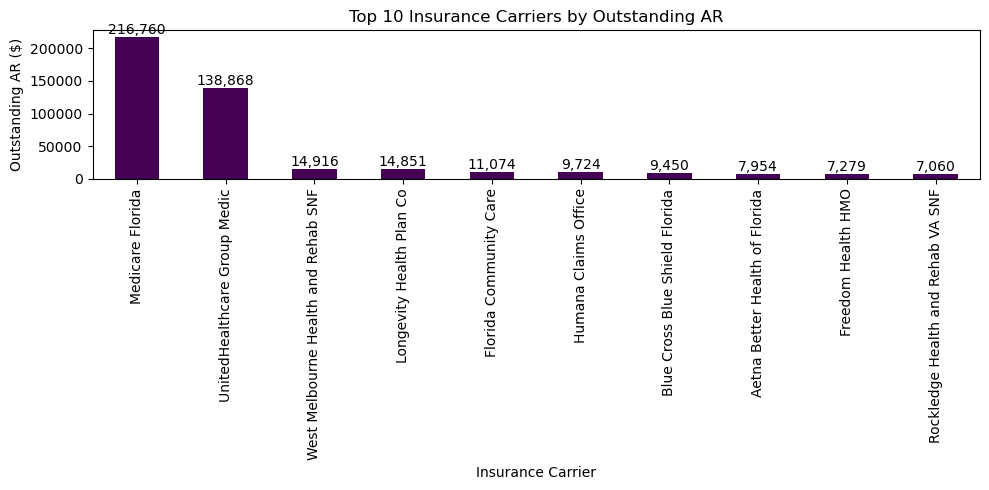

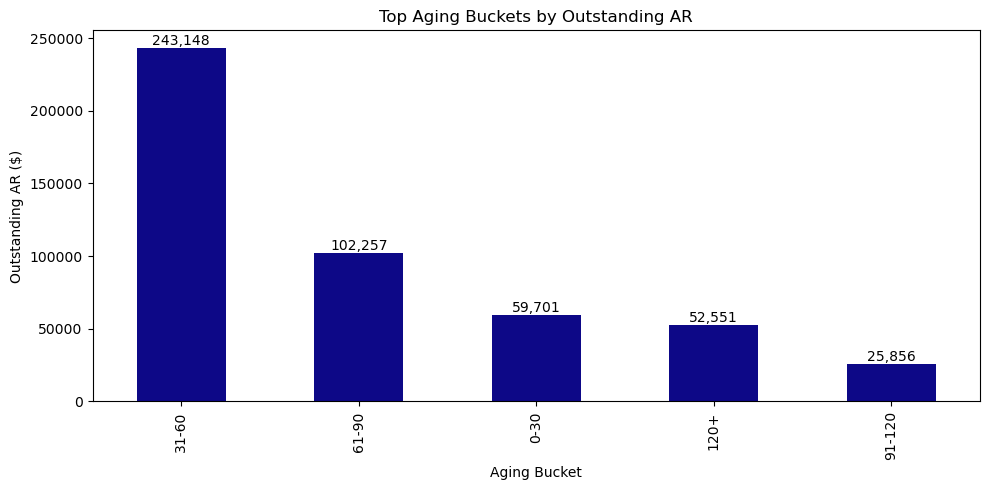

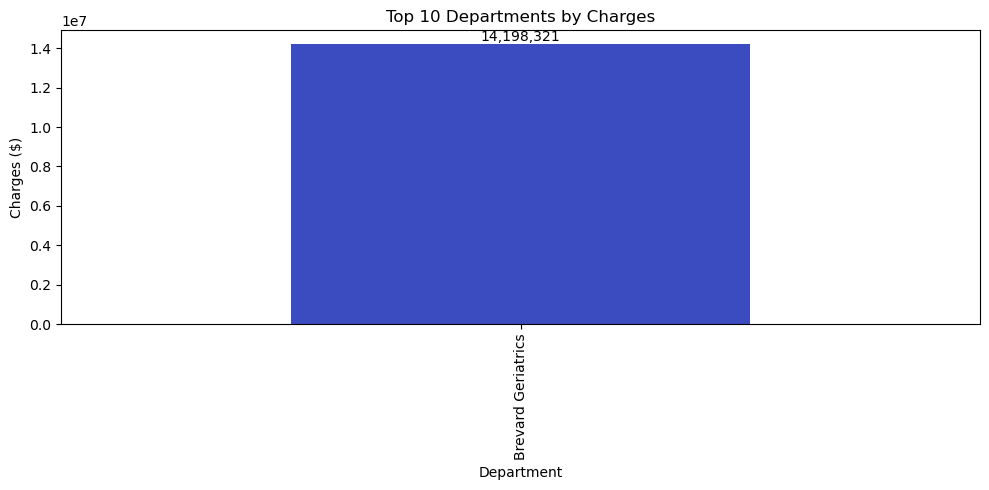

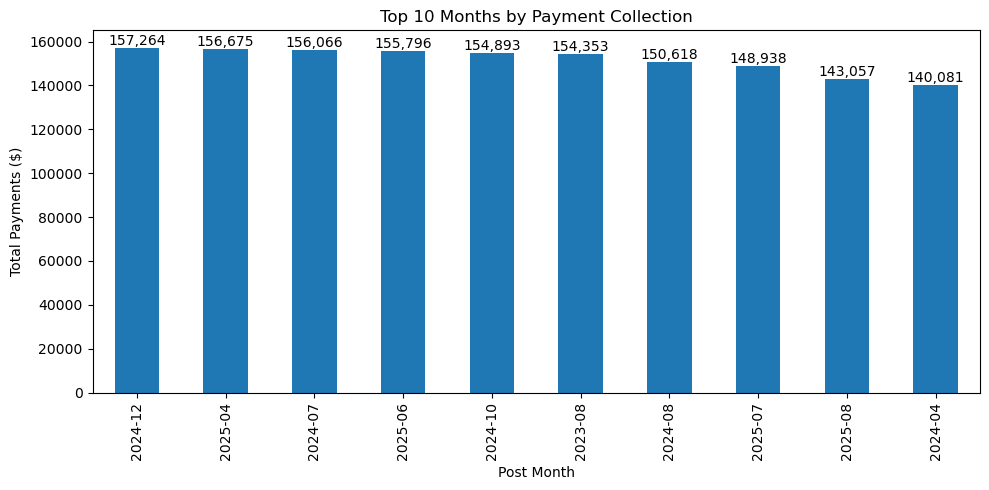

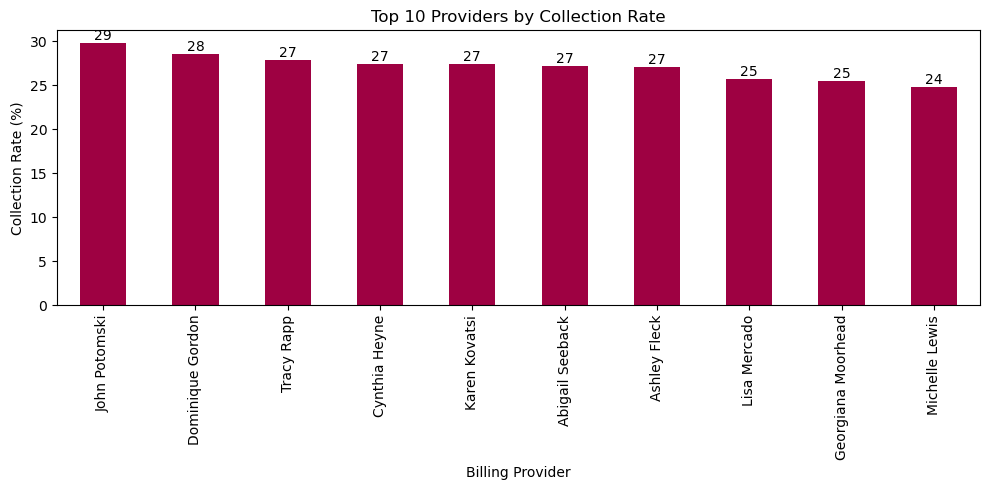

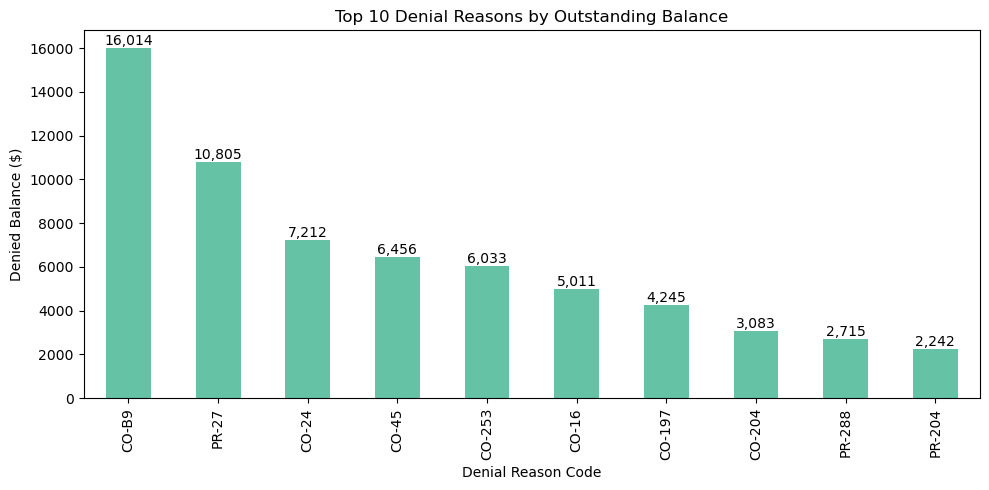

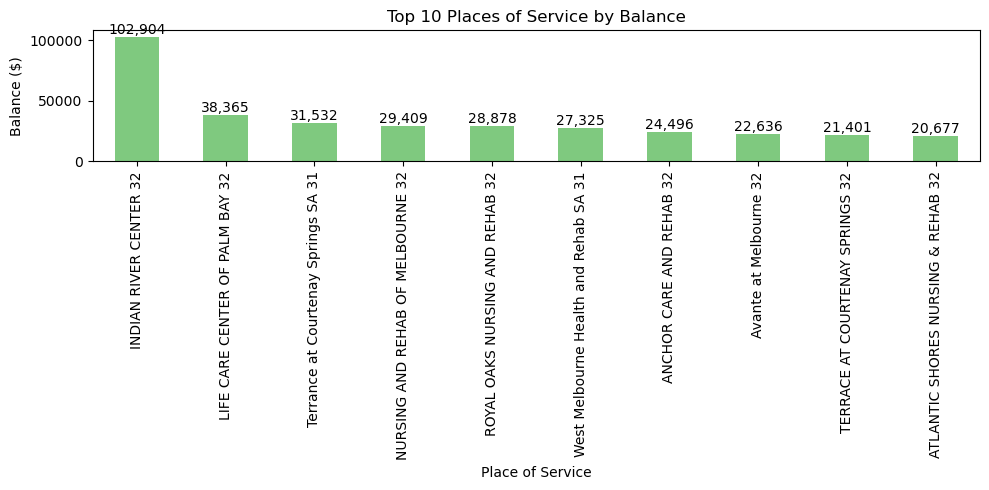

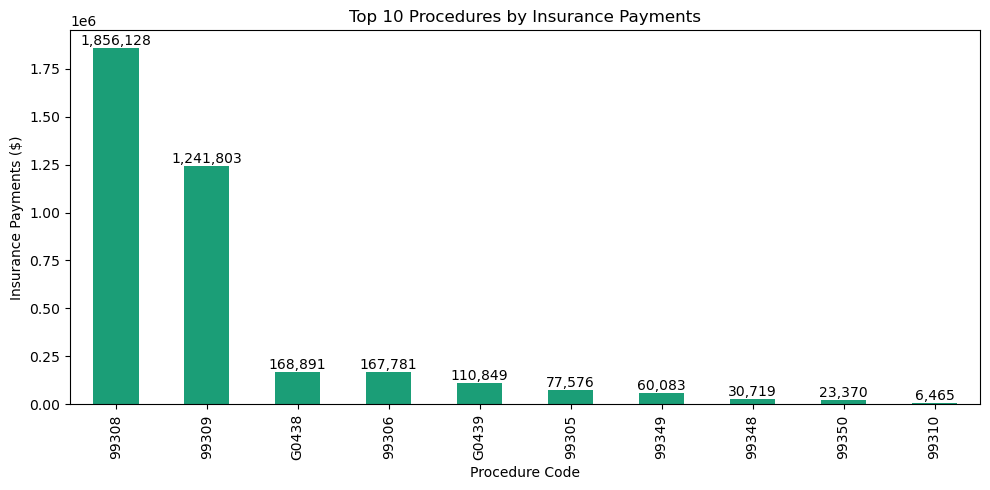

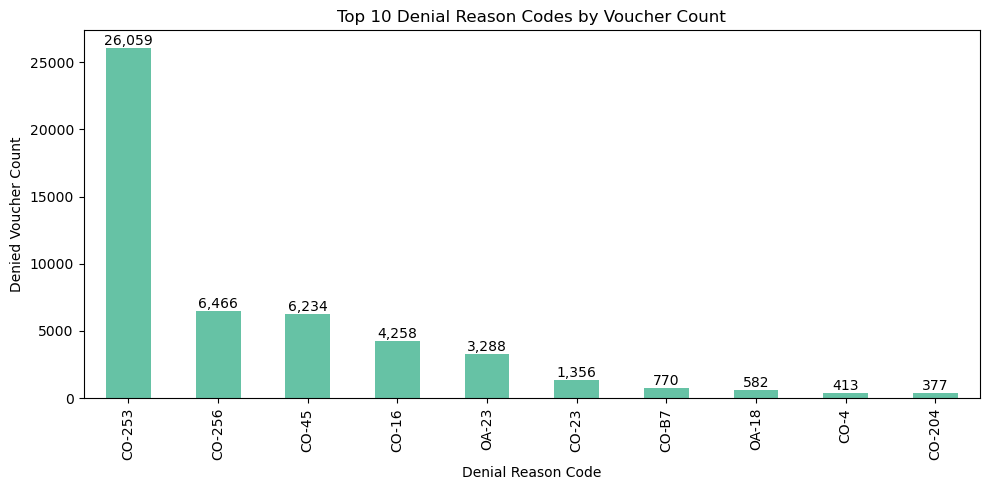

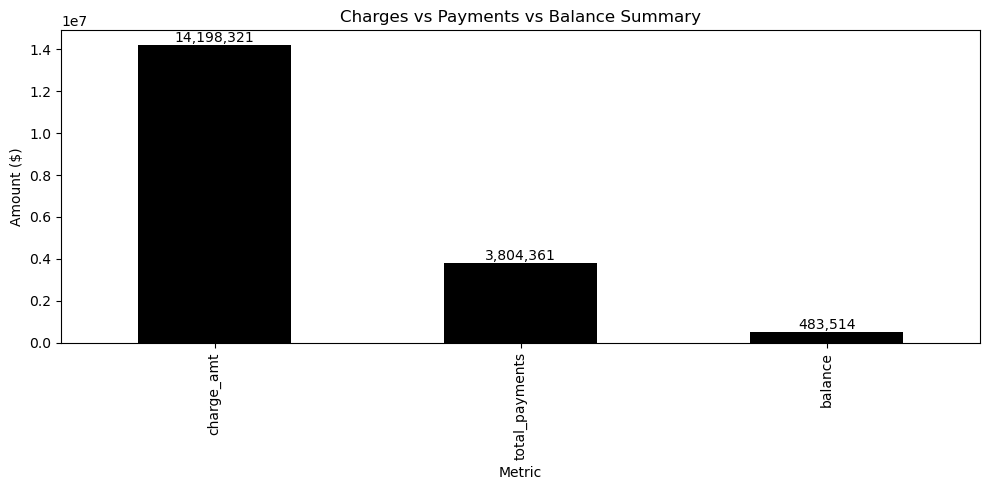

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. FEATURE ENGINEERING
# -----------------------------

# Date handling
df["post_date"] = pd.to_datetime(df["post_date"], errors="coerce")

# Total payments
df["total_payments"] = (
    df["patient_payments"].fillna(0) +
    df["insurance_payments"].fillna(0)
)

# Collection rate
df["collection_rate"] = (df["total_payments"] / df["charge_amt"]) * 100
df["collection_rate"] = df["collection_rate"].replace([float("inf"), -float("inf")], 0).fillna(0)

# AR days & aging bucket
df["ar_days"] = (pd.Timestamp.today() - df["post_date"]).dt.days
bins = [-1, 30, 60, 90, 120, 9999]
labels = ["0-30", "31-60", "61-90", "91-120", "120+"]
df["aging_bucket"] = pd.cut(df["ar_days"], bins=bins, labels=labels)

# Post month
df["post_month"] = df["post_date"].dt.to_period("M").astype(str)

# Denial flag
df["is_denied"] = df["latest_reason_code"].notna()

# -----------------------------
# 2. STANDARD PLOT FUNCTION
# -----------------------------

def plot_top10(series, title, xlabel, ylabel, colormap):
    plt.figure(figsize=(10, 5))
    ax = series.plot(kind="bar", colormap=colormap)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(
            f"{int(height):,}",
            (bar.get_x() + bar.get_width() / 2, height),
            ha="center",
            va="bottom",
            fontsize=10
        )

    plt.tight_layout()
    plt.show()

# -----------------------------
# 3. ALL 10 CHARTS
# -----------------------------

# Q1: Top 10 Insurance Carriers by Outstanding AR
plot_top10(
    df.groupby("primary_insurance_carrier")["balance"]
      .sum().sort_values(ascending=False).head(10),
    "Top 10 Insurance Carriers by Outstanding AR",
    "Insurance Carrier",
    "Outstanding AR ($)",
    "viridis"
)

# Q2: Top 10 Aging Buckets by Outstanding AR
plot_top10(
    df.groupby("aging_bucket")["balance"]
      .sum().sort_values(ascending=False).head(10),
    "Top Aging Buckets by Outstanding AR",
    "Aging Bucket",
    "Outstanding AR ($)",
    "plasma"
)

# Q3: Top 10 Departments by Charges
plot_top10(
    df.groupby("department")["charge_amt"]
      .sum().sort_values(ascending=False).head(10),
    "Top 10 Departments by Charges",
    "Department",
    "Charges ($)",
    "coolwarm"
)

# Q4: Top 10 Months by Payment Collection
plot_top10(
    df.groupby("post_month")["total_payments"]
      .sum().sort_values(ascending=False).head(10),
    "Top 10 Months by Payment Collection",
    "Post Month",
    "Total Payments ($)",
    "tab10"
)

# Q5: Top 10 Providers by Collection Rate
plot_top10(
    df.groupby("billing_provider")["collection_rate"]
      .mean().sort_values(ascending=False).head(10),
    "Top 10 Providers by Collection Rate",
    "Billing Provider",
    "Collection Rate (%)",
    "Spectral"
)

# Q6: Top 10 Denial Reasons by Outstanding Balance
plot_top10(
    df[df["is_denied"]]
      .groupby("latest_reason_code")["balance"]
      .sum().sort_values(ascending=False).head(10),
    "Top 10 Denial Reasons by Outstanding Balance",
    "Denial Reason Code",
    "Denied Balance ($)",
    "Set2"
)

# Q7: Top 10 Places of Service by Balance
plot_top10(
    df.groupby("place_of_service")["balance"]
      .sum().sort_values(ascending=False).head(10),
    "Top 10 Places of Service by Balance",
    "Place of Service",
    "Balance ($)",
    "Accent"
)

# Q8: Top 10 Procedures by Insurance Payments
plot_top10(
    df.groupby("procedure_code")["insurance_payments"]
      .sum().sort_values(ascending=False).head(10),
    "Top 10 Procedures by Insurance Payments",
    "Procedure Code",
    "Insurance Payments ($)",
    "Dark2"
)

# Q9: Top 10 Denial Reasons by Voucher Count
plot_top10(
    df[df["is_denied"]]
      .groupby("latest_reason_code")["voucher_number"]
      .nunique().sort_values(ascending=False).head(10),
    "Top 10 Denial Reason Codes by Voucher Count",
    "Denial Reason Code",
    "Denied Voucher Count",
    "Set2"
)

# Q10: Charges vs Payments vs Balance Summary
plot_top10(
    df[["charge_amt", "total_payments", "balance"]].sum(),
    "Charges vs Payments vs Balance Summary",
    "Metric",
    "Amount ($)",
    "cubehelix"
)


In [40]:
import os

OUTPUT_DIR = "charts_output"
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [41]:
def plot_top10(series, title, xlabel, ylabel, colormap, filename):
    plt.figure(figsize=(10, 5))
    ax = series.plot(kind="bar", colormap=colormap)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Add values on bars
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(
            f"{int(height):,}",
            (bar.get_x() + bar.get_width() / 2, height),
            ha="center",
            va="bottom",
            fontsize=10
        )

    plt.tight_layout()

    # 🔹 SAVE chart
    plt.savefig(os.path.join(OUTPUT_DIR, filename), dpi=300, bbox_inches="tight")
    plt.close()   # important to avoid memory issues


In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. CREATE OUTPUT FOLDER
# =========================
OUTPUT_DIR = "charts_output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# =========================
# 2. FEATURE ENGINEERING
# =========================
df["post_date"] = pd.to_datetime(df["post_date"], errors="coerce")

df["total_payments"] = (
    df["patient_payments"].fillna(0) +
    df["insurance_payments"].fillna(0)
)

df["collection_rate"] = (df["total_payments"] / df["charge_amt"]) * 100
df["collection_rate"] = df["collection_rate"].replace([float("inf"), -float("inf")], 0).fillna(0)

df["ar_days"] = (pd.Timestamp.today() - df["post_date"]).dt.days
bins = [-1, 30, 60, 90, 120, 9999]
labels = ["0-30", "31-60", "61-90", "91-120", "120+"]
df["aging_bucket"] = pd.cut(df["ar_days"], bins=bins, labels=labels)

df["post_month"] = df["post_date"].dt.to_period("M").astype(str)
df["is_denied"] = df["latest_reason_code"].notna()

# =========================
# 3. STANDARD SAVE FUNCTION
# =========================
def save_top10_chart(series, title, xlabel, ylabel, colormap, filename):
    plt.figure(figsize=(10, 5))
    ax = series.plot(kind="bar", colormap=colormap)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(
            f"{int(height):,}",
            (bar.get_x() + bar.get_width() / 2, height),
            ha="center",
            va="bottom",
            fontsize=9
        )

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, filename), dpi=300, bbox_inches="tight")
    plt.close()

# =========================
# 4. ALL 10 QUESTIONS + SAVE
# =========================

# Q1
save_top10_chart(
    df.groupby("primary_insurance_carrier")["balance"].sum().sort_values(ascending=False).head(10),
    "Top 10 Insurance Carriers by Outstanding AR",
    "Insurance Carrier", "Outstanding AR ($)", "viridis",
    "Q1_top10_insurance_carriers.png"
)

# Q2
save_top10_chart(
    df.groupby("aging_bucket")["balance"].sum().sort_values(ascending=False).head(10),
    "Top 10 Aging Buckets by Outstanding AR",
    "Aging Bucket", "Outstanding AR ($)", "plasma",
    "Q2_top10_aging_buckets.png"
)

# Q3
save_top10_chart(
    df.groupby("department")["charge_amt"].sum().sort_values(ascending=False).head(10),
    "Top 10 Departments by Charges",
    "Department", "Charges ($)", "coolwarm",
    "Q3_top10_departments_charges.png"
)

# Q4
save_top10_chart(
    df.groupby("post_month")["total_payments"].sum().sort_values(ascending=False).head(10),
    "Top 10 Months by Payment Collection",
    "Post Month", "Total Payments ($)", "tab10",
    "Q4_top10_monthly_payments.png"
)

# Q5
save_top10_chart(
    df.groupby("billing_provider")["collection_rate"].mean().sort_values(ascending=False).head(10),
    "Top 10 Providers by Collection Rate",
    "Billing Provider", "Collection Rate (%)", "Spectral",
    "Q5_top10_provider_collection_rate.png"
)

# Q6
save_top10_chart(
    df[df["is_denied"]].groupby("latest_reason_code")["balance"]
      .sum().sort_values(ascending=False).head(10),
    "Top 10 Denial Reasons by Outstanding Balance",
    "Denial Reason Code", "Denied Balance ($)", "Set2",
    "Q6_top10_denial_balance.png"
)

# Q7
save_top10_chart(
    df.groupby("place_of_service")["balance"].sum().sort_values(ascending=False).head(10),
    "Top 10 Places of Service by Balance",
    "Place of Service", "Balance ($)", "Accent",
    "Q7_top10_place_of_service.png"
)

# Q8
save_top10_chart(
    df.groupby("procedure_code")["insurance_payments"].sum().sort_values(ascending=False).head(10),
    "Top 10 Procedures by Insurance Payments",
    "Procedure Code", "Insurance Payments ($)", "Dark2",
    "Q8_top10_procedure_payments.png"
)

# Q9
save_top10_chart(
    df[df["is_denied"]].groupby("latest_reason_code")["voucher_number"]
      .nunique().sort_values(ascending=False).head(10),
    "Top 10 Denial Reasons by Voucher Count",
    "Denial Reason Code", "Denied Voucher Count", "Set2",
    "Q9_top10_denial_voucher_count.png"
)

# Q10
save_top10_chart(
    df[["charge_amt", "total_payments", "balance"]].sum(),
    "Charges vs Payments vs Balance Summary",
    "Metric", "Amount ($)", "cubehelix",
    "Q10_charges_vs_payments_vs_balance.png"
)
